# **IBM** *Data Science* Professional Certification Capstone : *Coursera*


## Project - **US Accident** Severity
#### Author : Avinash Wilson John Peter
#### Date   : 14-Sep-2020

### ***Table of Contents***
* [Introduction: Business Problem](#Introduction)
* [Data](#Data)
* [Methodology](#Methodology)
* [Results](#Results)
* [Discussion](#Discussion)
* [Conclusion](#Conclusion)

# Introduction

## Business Problem

All around the world, roads are shared by many motorized vehicles that have made transportation faster and more comfortable while supporting the country's economic status and social development. However, these vehicles cause many problems globally. Car accidents are responsible for 1.35M deaths on roadways every year. Almost 3.7k people are killed globally in road traffic crashes, where more than half of those killed are pedestrians, motorcyclists, and cyclists etc.

In this project we will try to construct an optimal model for predicting **The Severity of Road Accidents**. Specifically, this report will be targeted to stakeholders interested in knowing the chances of them, encountering into a road accident on a given day(with given factors) in and around New York. The severity falls under 5 categories, where **0 indicates less severity** and **4 indicated more severity**.

Since the road ways is preferred by many as a mode of transportation, the vehicles are prone to accident especially when the weather is not favourable.

So here, We will use our data science skills to predict whether the person has chances to encounter a Severe Collision based on few criteria. Upon analysing the data set and building a model to predict the severity, the people in New York who usually go by car might think of other alternatives.

# Data

### *Description* :
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset. 

### *Content* :
This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to June 2020 for the Contiguous United States. Check here to learn more about this dataset.

### *Inspiration* :
US-Accidents can be used for numerous applications such as real-time car accident prediction, studying car accidents hotspot locations, casualty analysis and extracting cause and effect rules to predict car accidents, and studying the impact of precipitation or other environmental stimuli on accident occurrence. The most recent release of the dataset can also be useful to study the impact of COVID-19 on traffic behavior and accidents.

### *Source* :

KAGGLE : [https://www.kaggle.com/sobhanmoosavi/us-accidents](https://www.kaggle.com/sobhanmoosavi/us-accidents)

In [1]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
# Import the data
df = pd.read_csv('US_Accidents_June20.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

The given data-set has 3513617 number of records with 48 attributes. Here, Attributes like *Zipcode, ID, Source* etc are not necessary while training the model.  Also, we are not going to consider all the records to fit our model because of **memory concerns**. So we will remove the unwanted attributes and NA records and wor with a **filtered** data-set *(based on States)*.

 # Methodology

* For implementing the solution, I have used **Github** as a repository and running **Jupyter Notebook** to preprocess data and build Machine Learning models. Regarding coding, I have used **Python** and its popular packages such as *Pandas, NumPy and Sklearn*.

* Once I have load data into Pandas Dataframe, used *‘info’* attribute to check the feature names and their data types. 

* Then I have *cleaned* the data and re-built the Attributes in a **Standardized Formats** to ease the usage.

* Then I have presented few **statistics** inferences coupled with **visuals** in the *Explanatory Data Analysis* Section.

* Because of my PC's **less computation capacity**, I have used only the records corresponding to the *New York* to proceed further.

* I have chosen the **Random Forest** machine learning model, I have also built and *evaluated* the model and shown the results with accuracy.

## Standardizing Time

In [3]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

## Handling Outliers

### Drop Rows with negative time frame

In [4]:
# Check if there is any negative time_duration values
print(df[td][df[td]<=0])

# Drop the rows with td<0
neg_outliers=df[td]<=0

# Set outliers to NAN
df[neg_outliers] = np.nan

# Drop rows with negative td
df.dropna(subset=[td],axis=0,inplace=True)

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
309387    -30.0
309388    -30.0
860988    -12.0
861024    -31.0
861041     -0.0
861475    -14.0
861494     -0.0
861495    -30.0
1497823   -30.0
1497824   -31.0
2234574   -30.0
2234659   -30.0
2234660   -31.0
3104499   -34.0
3104975    -7.0
3104978    -7.0
3232740   -31.0
Name: Time_Duration(min), dtype: float64


### Fill Outliers With Median Values

In [5]:
# Remove outliers for Time_Duration(min): n * standard_deviation (n=3), backfill with median
n=3
median = df[td].median()
std = df[td].std()
outliers = (df[td] - median).abs() > std*n

# Set outliers to NAN
df[outliers] = np.nan

# Fill NAN with median
df[td].fillna(median, inplace=True)

### Time Interval

In [6]:
print('Max time to clear an accident: {} minutes or {} hours or {} days; Min to clear an accident td: {} minutes.'.format(
    df[td].max(),round(df[td].max()/60), round(df[td].max()/60/24), df[td].min()))

Max time to clear an accident: 10140.0 minutes or 169 hours or 7 days; Min to clear an accident td: 1.0 minutes.


## Feature Selection

### Select a list of features for machine learning algorithms

In [7]:
# Setting the list of features to include in Machine Learning
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side',
             'City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 
             'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing',
             'Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming',
             'Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

### DataFrame with only Required Features

In [8]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513595 entries, 0 to 3513616
Data columns (total 34 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Source              object 
 1   TMC                 float64
 2   Severity            float64
 3   Start_Lng           float64
 4   Start_Lat           float64
 5   Distance(mi)        float64
 6   Side                object 
 7   City                object 
 8   County              object 
 9   State               object 
 10  Timezone            object 
 11  Temperature(F)      float64
 12  Humidity(%)         float64
 13  Pressure(in)        float64
 14  Visibility(mi)      float64
 15  Wind_Direction      object 
 16  Weather_Condition   object 
 17  Amenity             float64
 18  Bump                float64
 19  Crossing            float64
 20  Give_Way            float64
 21  Junction            float64
 22  No_Exit             float64
 23  Railway             float64
 24  Roundabout          floa

## Drop Rows With NA

In [9]:
# Check missing values
df_sel.isnull().mean()

Source                0.000194
TMC                   0.294525
Severity              0.000194
Start_Lng             0.000194
Start_Lat             0.000194
Distance(mi)          0.000194
Side                  0.000194
City                  0.000225
County                0.000194
State                 0.000194
Timezone              0.001298
Temperature(F)        0.018894
Humidity(%)           0.020019
Pressure(in)          0.016092
Visibility(mi)        0.021775
Wind_Direction        0.016945
Weather_Condition     0.021855
Amenity               0.000194
Bump                  0.000194
Crossing              0.000194
Give_Way              0.000194
Junction              0.000194
No_Exit               0.000194
Railway               0.000194
Roundabout            0.000194
Station               0.000194
Stop                  0.000194
Traffic_Calming       0.000194
Traffic_Signal        0.000194
Turning_Loop          0.000194
Sunrise_Sunset        0.000226
Hour                  0.000194
Weekday 

In [10]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(2408025, 34)

## Explanatory Data Analysis

In [71]:
from datetime import  date
# Define lists of states, colors, linestyles, month order, day_order, and hour_order
# For this notebook, we will focus on the following three states: NJ, PA, & NY
state_lst=['NJ','PA','NY']
state_lst_full=['New Jersey','Pennsylvania','New York']

# We will focus on accident severities 2, 3 & 4
severity_lst=[2,3,4]

# Set a list of colors, markers and linestyles for plotting
color_lst=['tab:red','tab:blue','tab:green']
marker_lst=['D','o','*']
linestyle_lst=['dashed','dashdot','solid']

# Set a list of month, weekday, hour for reindex purpose and time_duraction to clear the accident
month_lst = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_lst = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_lst_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_lst= np.arange(24)
td='Time_Duration(min)'

df = pd.read_csv('US_Accidents_June20.csv')
df = df[df.State.isin(state_lst)]
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194254,A-194256,MapQuest,201.0,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,...,False,False,False,False,True,False,Night,Day,Day,Day
194255,A-194257,MapQuest,241.0,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
194256,A-194258,MapQuest,201.0,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
194257,A-194259,MapQuest,201.0,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
194258,A-194260,MapQuest,201.0,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


In [72]:
# Extract year, month, day, hour, & weekday information

# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
df['Start_Year']=df['Start_Time'].dt.year
df['Start_Month']=df['Start_Time'].dt.strftime('%b')
df['Start_Day']=df['Start_Time'].dt.day
df['Start_Hour']=df['Start_Time'].dt.hour
df['Start_Weekday']=df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
td='Time_Duration(min)'
df[td]=round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


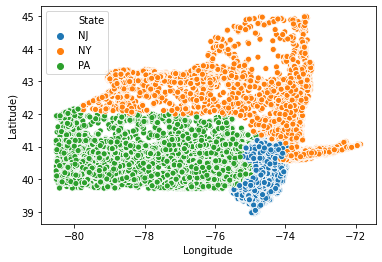

In [73]:
# Visualization: map of accidents by state
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='State')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

In [74]:
# Check the beginning and end date of this dataset
print('This dataset contains data beween {} and {}.'.format(df.Start_Time.min(),df.Start_Time.max()))

This dataset contains data beween 2016-02-09 11:28:49 and 2020-06-30 21:34:21.


In [75]:
# Find out how many days (Monday-Sunday) between the beginning and end of this dataset.

calendar_weekday_num=[]

d1=df.Start_Time.min()
d2=df.Start_Time.max()

for i in range(7):

    count = 0

    for d_ord in range(d1.toordinal(), d2.toordinal()+1):
        d = date.fromordinal(d_ord)
        if (d.weekday() == i):
            count += 1
    calendar_weekday_num.append(count)

print('Number of days for Monday-Sunday: {}.'.format(calendar_weekday_num))
print('Total number of days between {} and {}: {} days.'.format(d1,d2,sum(calendar_weekday_num)))

Number of days for Monday-Sunday: [229, 230, 229, 229, 229, 229, 229].
Total number of days between 2016-02-09 11:28:49 and 2020-06-30 21:34:21: 1604 days.


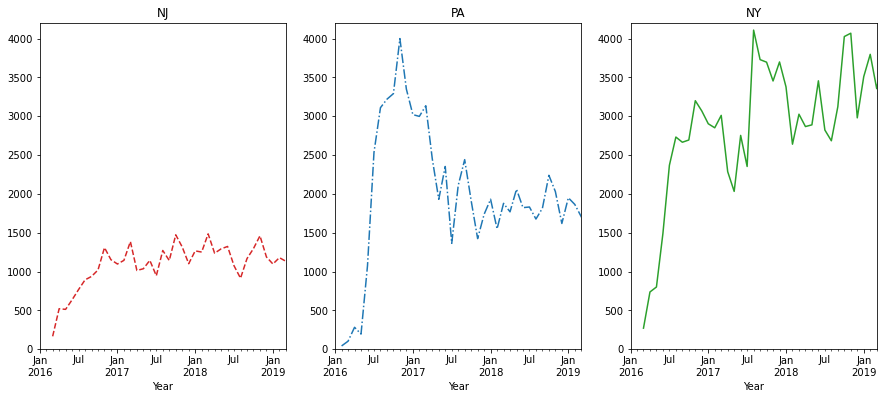

In [76]:
# Time series analysis, resample by month

# Set the start_time as the index for resampling purpose

df.set_index('Start_Time',drop=True,inplace=True)


# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
     # Slice the dataframe for the specific state and weekday
    df[df['State']==state].resample('M').count()['ID'].plot(linestyle=linestyle_lst[i], color=color_lst[i])
    
    # Set the limits and labels
    plt.xlim('2016','2019-Mar')
    plt.ylim(0,4200)
    plt.xlabel('Year')
    plt.title('{}'.format(state))

plt.show()

# Reset the index back for further data analysis
df.reset_index(inplace=True)

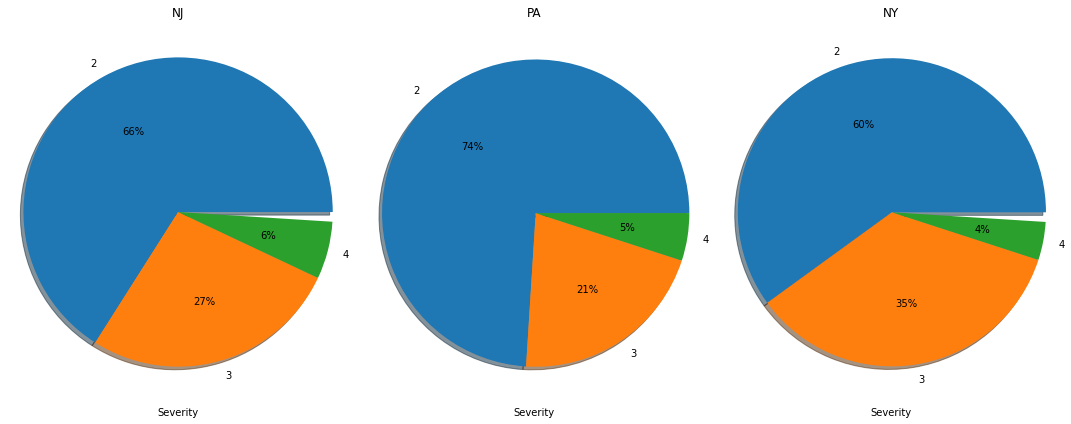

In [77]:
# The severity of accidents for each state
feature='Severity'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=0

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

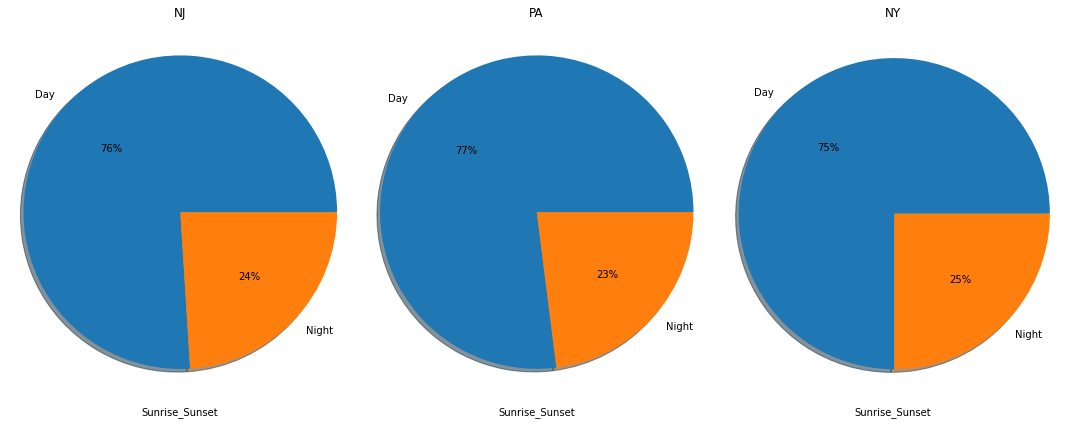

In [78]:
# The day or night when accidents occurred for each state
feature='Sunrise_Sunset'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)
    
plt.tight_layout()
plt.show()

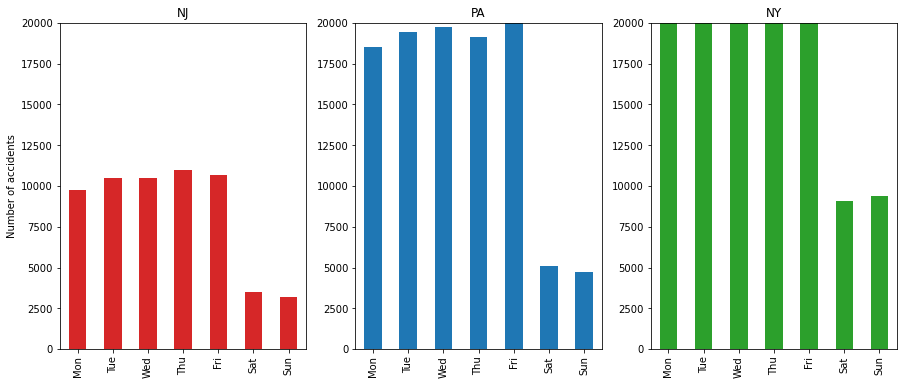

In [79]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY (for the whole dataset)
# Set the size of the figure
fig= plt.figure(figsize=(15,6))

for i,state in enumerate(state_lst):
    plt.subplot(1, 3, 1+i)
    df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst).plot(kind='bar',color=color_lst[i]).set_title(state)
    plt.xlabel('')
    plt.ylim(0, 20000)
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

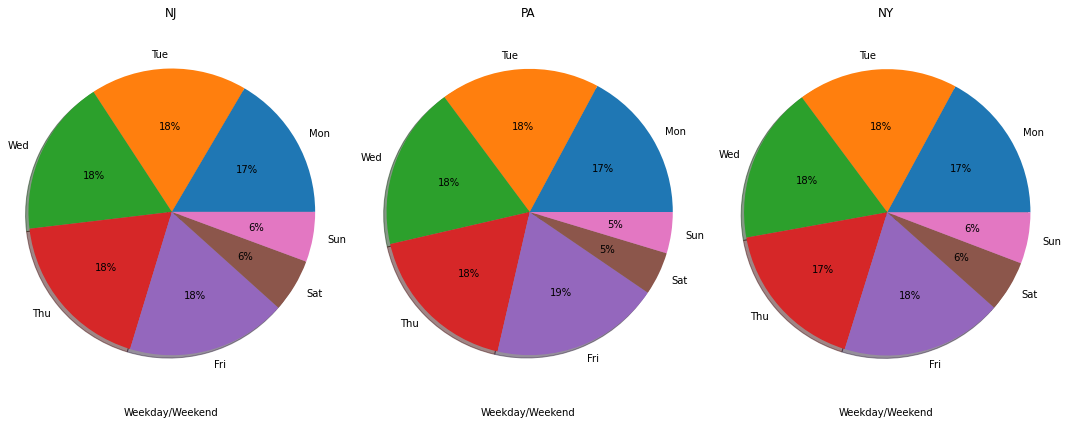

In [82]:
# For each state, find out how many unique days for each weekday/weekend

# Initialize an empty list to hold the number of days for each weekday/weekend for the three states
weekday_num_state=[]

# Run a for loop for the list of states: NJ, PA, & NY
for state in state_lst:
    
    # Initialize an empty list to hold the number of days for each weekday
    weekday_num=[]
    
    # Run a for loop for the whole week
    for weekday in weekday_lst:
        
        # Slice the dataframe for specific state & weekday
        df_weekday=df[(df['State']==state) & (df.Start_Weekday==weekday)]
        
        # For each weekday, extract the day information from the Start_Time column, by separating the datetime into day and hour
        day_lst1=df_weekday.Start_Time.astype(str).str.split(' ')
        
        # Extract the first item which is the day information
        day_lst2=[item[0] for item in day_lst1]
        
        # Append the day into the list weekday_num
        weekday_num.append(len(set(day_lst2)))

    # Append the day with state information encoded into the list weekday_num_state
    weekday_num_state.append(weekday_num)
# Accidents per day on weekdays/weekends in NJ, PA & NY
# Set the size of the figure

# The severity for each location for each state; for each of the following locations, what's the severity of the accident?
feature='Start_Weekday'
fig_x=len(state_lst)


# Divide the total number of accidents by the number of unique days

# Set the size of the figure
fig= plt.figure(figsize=(5*fig_x,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''

# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    
    # Slice the dataframe for the specific state and weekday
    df_temp=df[df['State']==state].groupby('Start_Weekday').count()['ID'].reindex(weekday_lst)
    
    # checkpoint
    # print('df_temp:', df_temp)
    # print('weekday_num_state[i]:',weekday_num_state[i])
    
    # Divid the number of accidents by the number of unique days, using list comprehension
    df_temp2=[round(int(item1)/int(item2)) for item1,item2 in zip(df_temp,weekday_num_state[i])]
    
    # checkpoint
    # print('df_temp2:', df_temp2)
    
    # Convert the list of pandas series for plot
    df_temp2=pd.Series(df_temp2)
    
    # Make a bar plot, using different color and set the title as the state
    # df_temp2.plot(kind='bar',color=color_lst[i]).set_title(state)
    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else '' for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp2, labels=labels, autopct=my_autopct, shadow=True)
        
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel('Weekday/Weekend')
    plt.title(state)

        

plt.tight_layout()
plt.show()


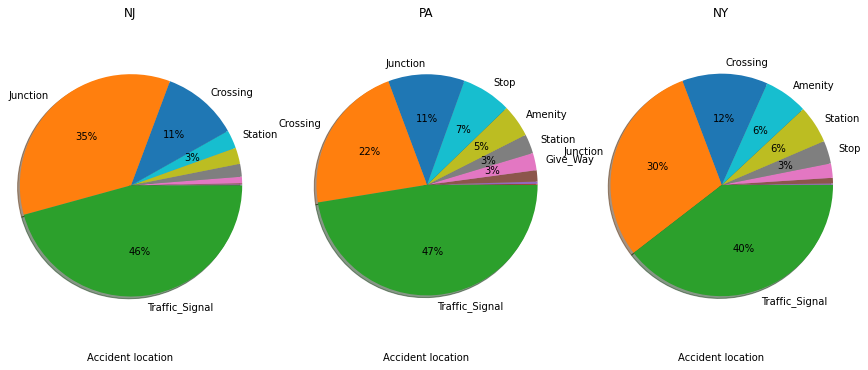

In [83]:
# The location of accidents for each state
# Where are the accidents?
feature='Accident location'

# Set the state as the index
df.set_index('State',drop=True,inplace=True)

# State is the index when selecting bool type data as df_bool
df_bool=df.select_dtypes(include=['bool'])

# Reset the index of the original data for other calculations
df.reset_index(inplace=True)

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2.5

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df_bool[df_bool.index==state]
    df_temp=(df_temp.sum(axis=0)/df_temp.sum(axis=0).sum()).sort_values()

    
    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.xlabel(feature)
plt.show()

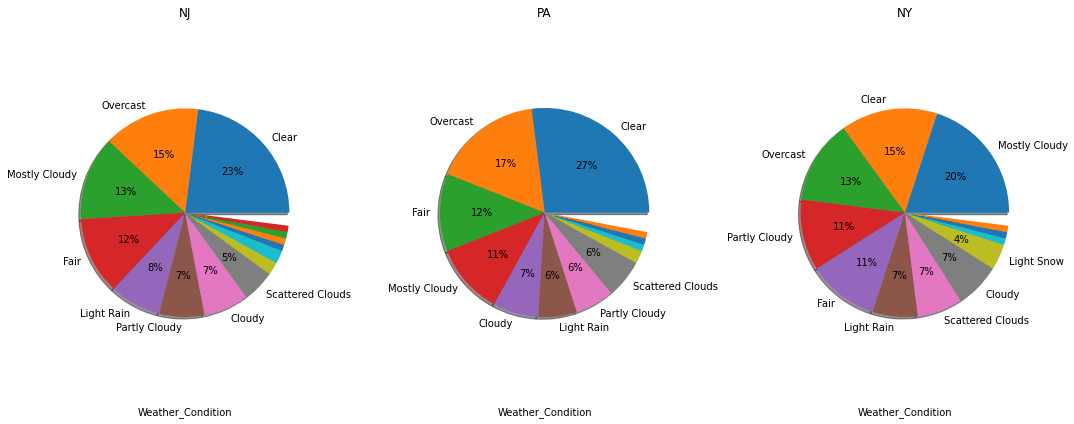

In [84]:
# The weather condition for each state
feature='Weather_Condition'

# Set the size of the figure
fig= plt.figure(figsize=(15,6))

# Cutoff percentage for display
pct_cutoff=2

# Define autopct: only display the value if the percentage is greater than the predefined cutoff value
def my_autopct(pct):
    return ('%1.0f%%' % pct) if pct > pct_cutoff else ''


# Run a for loop for each state
for i,state in enumerate(state_lst):
    
    # Set a sub plot
    plt.subplot(1, 3, 1+i)
    # Slice the dataframe for the specific state and feature
    df_temp=df[df['State']==state][feature].value_counts(normalize=True).round(2)

    # Define lables to go with the pie plot
    labels = [n if v > pct_cutoff/100 else ''
              for n, v in zip(df_temp.index, df_temp)] 
    
    # Generate the pie plot
    plt.pie(df_temp, labels=labels, autopct=my_autopct, shadow=True)
    
    # Set axis,label and title
    plt.axis('equal')
    plt.xlabel(feature)
    plt.title(state)

plt.tight_layout()
plt.show()

!!!**Since the data-set is too large and since I don't have a GPU, I am proceeding to analyze and model for a particular city i.e) New York**!!!

## Considering Only New York

In [11]:
# Set state
state='NY'

# Select the state of New York
df_state=df_sel.loc[df_sel.State==state]
df_state.drop('State',axis=1, inplace=True)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116414 entries, 194255 to 2476575
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Source              116414 non-null  object 
 1   TMC                 116414 non-null  float64
 2   Severity            116414 non-null  float64
 3   Start_Lng           116414 non-null  float64
 4   Start_Lat           116414 non-null  float64
 5   Distance(mi)        116414 non-null  float64
 6   Side                116414 non-null  object 
 7   City                116414 non-null  object 
 8   County              116414 non-null  object 
 9   Timezone            116414 non-null  object 
 10  Temperature(F)      116414 non-null  float64
 11  Humidity(%)         116414 non-null  float64
 12  Pressure(in)        116414 non-null  float64
 13  Visibility(mi)      116414 non-null  float64
 14  Wind_Direction      116414 non-null  object 
 15  Weather_Condition   116414 n

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


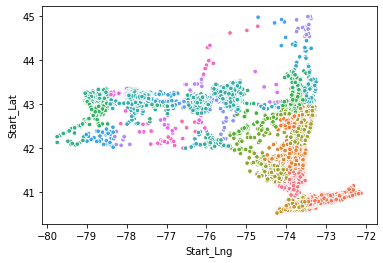

In [37]:
# Map of accidents in New York
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df_state, hue='County', legend=False, s=20)
plt.show()

## Handling Categorical Attributes

In [38]:
# Generate dummies for categorical data
df_state_dummy = pd.get_dummies(df_state,drop_first=True)

## Train Test Split

In [39]:
# Assign the data
df=df_state_dummy

# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable
# set X and y
y = df[target]
X = df.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

## Modeling : **Random Forest**

In [58]:
# Random Forest algorithm

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=750)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

# Get the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred)


In [59]:
# Model Accuracy, how often is the classifier correct?
print("[Randon forest algorithm] accuracy_score: {:.3f}.".format(accuracy_rf))

[Randon forest algorithm] accuracy_score: 0.887.


### Visualize Key Features

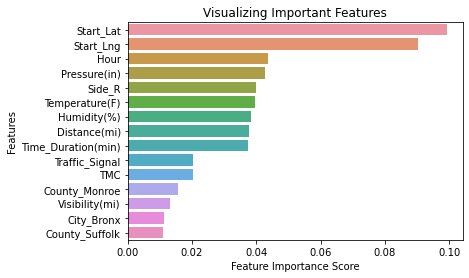

In [60]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=15

sns.barplot(x=feature_imp[:15], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Modeling with only Top Features : RF

In [61]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.021
sfm = SelectFromModel(clf, threshold=0.021)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Start_Lng
Start_Lat
Distance(mi)
Temperature(F)
Humidity(%)
Pressure(in)
Hour
Time_Duration(min)
Side_R


In [63]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=750, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=0)

# Results

In [64]:
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Randon forest algorithm -- Limited feature] accuracy_score: {:.3f}.'.format(accuracy_score(y_test, y_important_pred)))

[Randon forest algorithm -- Limited feature] accuracy_score: 0.884.


#### So, with the **Random Forest Classifier** above, we were able to derive **88.4%** of accuracy with the *test set*.

# Discussion

* The accuracy gained from this model is pretty much good on a scale upto 88.4 in the Test Accuracy.
* As a future work, similar models likes *Decision Trees, K-Nearest Neighbour, Multiclass Logistic Regression* etc can be built on the same dataset.
* Upon constructing those models, a final model using **Ensemble Learning**  can be built to boost up the *accuracy* of the model.
* Also, with a **GPU** its efficient to build the model using *whole of the data-set*.

# Conclusion

Based on the dataset chosen for this capstone from Time, Weather, and Temperature conditions pointing to certain classes, we can conclude that particular conditions has an impact on whether or not travel could result in less serious (class 0) or more severe accident(class 4), in and around New York.